In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [3]:
df = pd.read_csv('../preprocessing/output.csv')
df.head()

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,encoded_cuisines,cluster_label,cluster
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,[2 3 1 4 0],0,2
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,[3 2 4 0 1 5],0,2
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,[0 1],0,2
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,[1 0 2 3],0,2
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,[2 0 1],2,2


In [4]:
df = df.drop(['cluster_label','cluster'],axis = 1)
df.head()

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,encoded_cuisines
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,[2 3 1 4 0]
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,[3 2 4 0 1 5]
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,[0 1]
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,[1 0 2 3]
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,[2 0 1]


In [5]:
df['num_cuisines'] = df['cuisines'].apply(lambda x: len(x.split(',')))

# Display the DataFrame with the new 'num_cuisines' column
df.head()

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,encoded_cuisines,num_cuisines
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,[2 3 1 4 0],5
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,[3 2 4 0 1 5],6
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,[0 1],2
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,[1 0 2 3],4
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,[2 0 1],3


In [6]:
df = df.drop('encoded_cuisines',axis=1)
df.head()

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,num_cuisines
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,5
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,6
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,2
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,4
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,3


applying Kmeans clustering on votes and number_of_cuisines to get an idea or relation

In [7]:
from sklearn.cluster import KMeans
X = df[['num_cuisines', 'votes']]

# Initialize the KMeans model
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit the model
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Display the DataFrame with the cluster labels
df.head()

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,num_cuisines,cluster
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,5,1
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,6,1
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,2,1
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,4,1
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,3,1


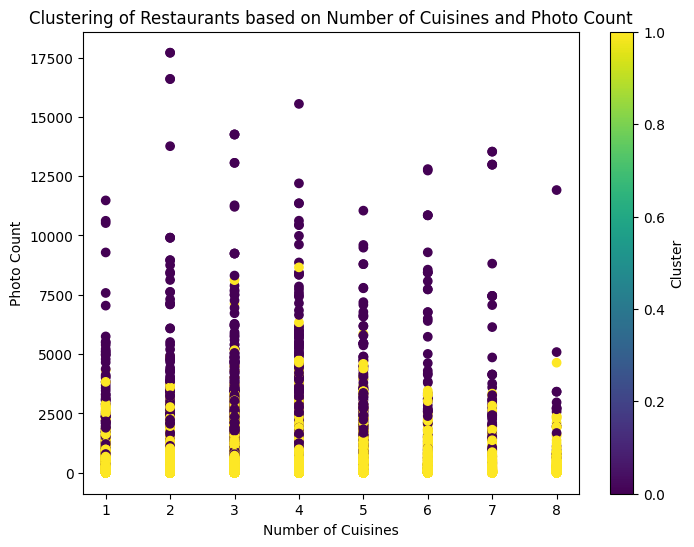

In [8]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['num_cuisines'], df['photo_count'], c=df['cluster'], cmap='viridis')
plt.xlabel('Number of Cuisines')
plt.ylabel('Photo Count')
plt.title('Clustering of Restaurants based on Number of Cuisines and Photo Count')
plt.colorbar(label='Cluster')
plt.show()

from the 2 clusters we try to find the relation between those features and average_cost_for_two

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate the data into clusters
cluster0 = df[df['cluster'] == 0]
cluster1 = df[df['cluster'] == 1]

# Linear regression for cluster 0
X_cluster0 = cluster0[['num_cuisines', 'photo_count']]
y_cluster0 = cluster0['average_cost_for_two']
model_cluster0 = LinearRegression().fit(X_cluster0, y_cluster0)

# Linear regression for cluster 1
X_cluster1 = cluster1[['num_cuisines', 'photo_count']]
y_cluster1 = cluster1['average_cost_for_two']
model_cluster1 = LinearRegression().fit(X_cluster1, y_cluster1)




# Make predictions
y_pred_cluster0 = model_cluster0.predict(X_cluster0)
y_pred_cluster1 = model_cluster1.predict(X_cluster1)


# Calculate Mean Squared Error (MSE) and R-squared for cluster 0
mse_cluster0 = mean_squared_error(y_cluster0, y_pred_cluster0)
r2_cluster0 = r2_score(y_cluster0, y_pred_cluster0)

# Calculate Mean Squared Error (MSE) and R-squared for cluster 1
mse_cluster1 = mean_squared_error(y_cluster1, y_pred_cluster1)
r2_cluster1 = r2_score(y_cluster1, y_pred_cluster1)




print("Cluster 0:")
print("  Mean Squared Error (MSE):", mse_cluster0)
print("  R-squared:", r2_cluster0)

print("\nCluster 1:")
print("  Mean Squared Error (MSE):", mse_cluster1)
print("  R-squared:", r2_cluster1)





Cluster 0:
  Mean Squared Error (MSE): 420084.482761386
  R-squared: 0.10607290549430481

Cluster 1:
  Mean Squared Error (MSE): 295231.37319616467
  R-squared: 0.13787238483038544


In [10]:
X = df[['num_cuisines', 'votes', 'average_cost_for_two']]

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

df.head()


,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,num_cuisines,cluster
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,5,1
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,6,1
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,2,1
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,4,1
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,3,1


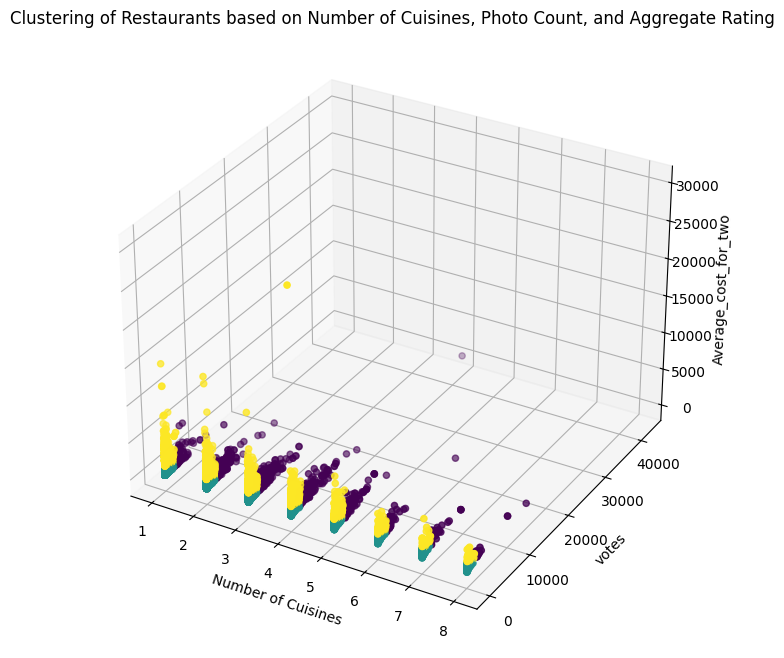

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['num_cuisines'], df['votes'], df['average_cost_for_two'], c=df['cluster'], cmap='viridis')
ax.set_xlabel('Number of Cuisines')
ax.set_ylabel('votes')
ax.set_zlabel('Average_cost_for_two')
ax.set_title('Clustering of Restaurants based on Number of Cuisines, Photo Count, and Aggregate Rating')
plt.show()


Applying Decision Tree on features average_cost_for_two , votes , num_cuisines to find relation of these with Aggregate_rating 

this comes under classification

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['average_cost_for_two', 'votes','num_cuisines','cluster']]
y = df['aggregate_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the decision tree regressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Decision Tree Regressor:
Mean Squared Error: 0.3015763293591254
R-squared: 0.8582706714784007


Applying Random forest Regressor from classification to get relationship between the above three features and target

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest regressor
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor on Clustered Data:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Random Forest Regressor on Clustered Data:
Mean Squared Error: 0.26030651421486634
R-squared: 0.8764447221735386


Applying gradient booster under classification between the features to get accuracy

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df[['average_cost_for_two', 'votes', 'cluster','num_cuisines']]  # Using 'cluster_label' as a feature
y = df['aggregate_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the gradient boosting regressor
model = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor on Clustered Data:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Gradient Boosting Regressor on Clustered Data:
Mean Squared Error: 0.23538272321821796
R-squared: 0.8882748752927097


This code above shows relation and accuracy of relation between num_cuisines , average_cost_for_two , votes and aggregate_rating